LOGISTIC REGRESSION WITH NEWTON'S METHOD
Loading Spambase dataset...
Dataset loaded successfully:
  Features: 4601 samples, 57 features
Train Accuracy: 0.9302
Test Accuracy: 0.9251
Confusion Matrix:
[[530  28]
 [ 41 322]]


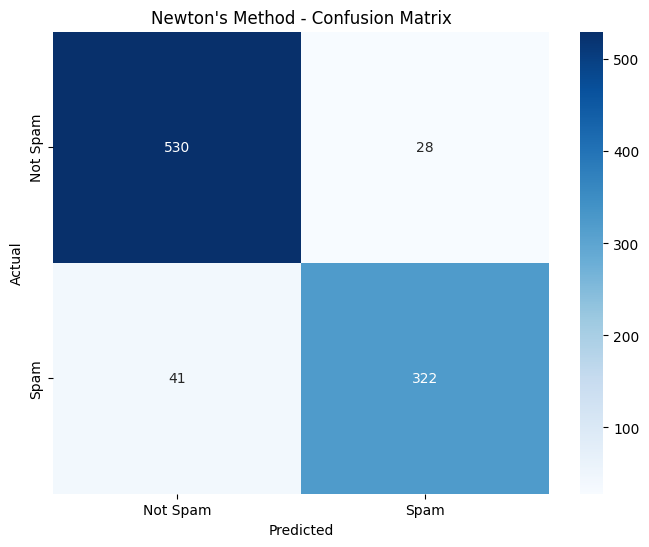

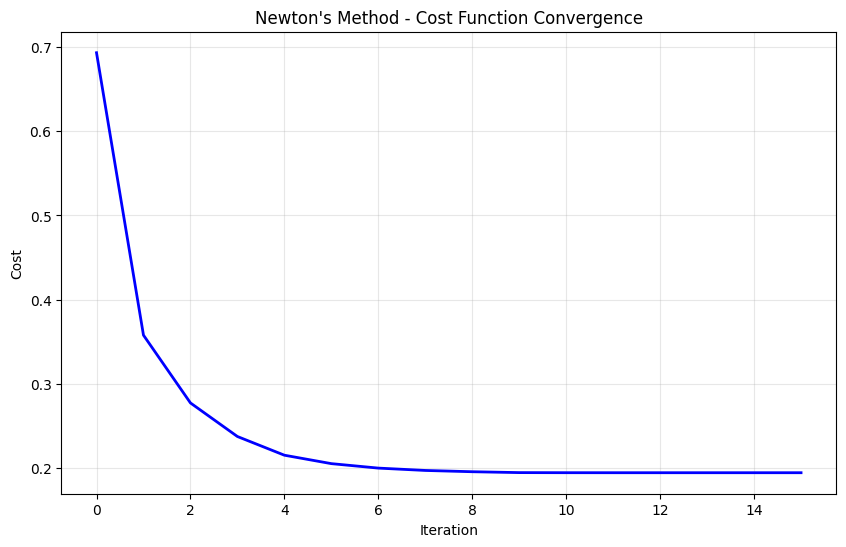

In [10]:
%pip install ucimlrepo

import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class LogisitcRegressionNewton:
    """
    Logistic Regression using Newton's Method
    """
    def __init__(self, max_iterations = 100, tolerance = 1e-6, fit_intercept = True):
        """
        Parameters
        ----------
        max_iterations : int
            Maximum number of iterations
        tolerance : float
            Tolerance for convergence
        fit_intercept : bool
            Whether to fit an intercept
        """
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.fit_intercept = fit_intercept
        self.weights = None
        self.cost_history = []

    def sigmoid(self, z):
        """
        Sigmod function
        """
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def add_intercept(self, X):
        """
        Add intercept to the features
        Parameters:
        -----------
        X : numpy array
        """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def cost_function(self, X, y, weights):
        """
        Calculate the cost function
        Parameters:
        -----------
        X : numpy array
            Features
        y : numpy array
            Targets
        """
        n_samples = X.shape[0]

        # Predictions
        y_pred = self.sigmoid(X @ weights)

        epsilon = 1e-7
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

        return cost

    def gradient(self, X, y, weights):
        """
        Calculate the gradient of the cost function
        Parameters:
        -----------
        X : numpy array
            Features
        y : numpy array
            Targets
        """
        n_samples = X.shape[0]

        # Predictions
        y_pred = self.sigmoid(X @ weights)

        # Gradient
        gradient = (1 / n_samples) * X.T @ (y_pred - y)
        return gradient


    def hessian(self, X, y, weights):
        """
        Hessian matrix
        Parameters:
        -----------
        X : numpy array
            Features
        y : numpy array
        """
        n_samples = X.shape[0]

        # Predictions
        y_pred = self.sigmoid(X @ weights)

        # Hessian
        hessian = (1 / n_samples) * X.T @ np.diag(y_pred * (1 - y_pred)) @ X
        return hessian

    def fit(self, X, y):
        """
        Fit the model using Newton's Method
        Parameters:
        -----------
        X : numpy array
            Features
        y : numpy array
            Targets
        """
        X = X if not self.fit_intercept else self.add_intercept(X)
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)

        self.cost_history.clear()

        for i in range(self.max_iterations):
            # Calculate Cost
            cost = self.cost_function(X, y, self.weights)
            self.cost_history.append(cost)

            # Calculate gradient and hessian
            gradient = self.gradient(X, y, self.weights)
            hessian = self.hessian(X, y, self.weights)

            hessian += 1e-8 * np.eye(hessian.shape[0])

            # Update weights
            delta = np.linalg.solve(hessian, gradient)
            self.weights -= delta

            # Check convergence
            if np.linalg.norm(delta) < self.tolerance:
                break

    def predict_proba(self, X):
        """
        Predict the probability of the target
        Parameters:
        -----------
        X : numpy array
            Features
        """
        X = X if not self.fit_intercept else self.add_intercept(X)
        return self.sigmoid(X @ self.weights)

    def predict(self, X, threshold = 0.5):
        """
        Predict the target
        Parameters:
        -----------
        X : numpy array
            Features
        threshold : float
            Threshold for classification
        """
        return (self.predict_proba(X) >= threshold).astype(int)


def fetch_spambase_data():
    """
    Fetch Spambase dataset from UCI repository
    Returns:
    --------
    X : numpy array
        Features
    y : numpy array
        Targets
    """
    spambase = fetch_ucirepo(id=94)
    # Extract features and targets
    X, y = spambase.data.features.values, spambase.data.targets.values.ravel()
    return X, y

def main():
    print("="*60)
    print("LOGISTIC REGRESSION WITH NEWTON'S METHOD")
    print("="*60)

    # Fetch data
    print("Loading Spambase dataset...")
    X, y = fetch_spambase_data()

    print(f"Dataset loaded successfully:")
    print(f"  Features: {X.shape[0]} samples, {X.shape[1]} features")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Normalizer
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train
    model = LogisitcRegressionNewton()
    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Train Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print(f"Confusion Matrix:\n{cm}")
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title("Newton's Method - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.cost_history, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title("Newton's Method - Cost Function Convergence")
    plt.grid(True, alpha=0.3)
    plt.show()


if __name__ == "__main__":
    main()
